In [24]:
#!pip install --upgrade pip
!pip install pyathena


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [49]:
#Upgrade de la version de seaborn para poder hacer graficos mas facil 
!pip install seaborn==0.12.2


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [50]:
#Libraries
from pyathena import connect
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


# Taigo datos de tablas que arme yo y de receiver

In [30]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'
origin_name = 'AwsDataCatalog'
database_name1 = 'viamericas'
database_name2 = 'analytics'
tabla1 = 'tb2_fraud_jp'
tabla2 = 'tb_fraud_jp'
tabla3 = 'receiver'
tabla4 = 'receiver_fraud'

In [64]:
#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')
#df1 = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name2}.{tabla1};', conn)
#df2 = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name2}.{tabla2};', conn)
df_fraud = pd.read_sql(f'Select r.date_receiver, r.id_receiver, r.id_branch, rf.fraud_type, r.id_sender , r.id_country_receiver, r.id_payment, r.id_state_receiver, r.id_city_receiver, r.bank_receiver FROM {origin_name}.{database_name1}.{tabla4} rf INNER JOIN {origin_name}.{database_name1}.{tabla3} r ON rf.ID_BRANCH = r.ID_BRANCH AND rf.ID_RECEIVER = r.ID_RECEIVER', conn)
df_hora = pd.read_sql(f'SELECT	hour(DATE_RECEIVER) hora, COUNT(*) cant FROM	{origin_name}.{database_name1}.{tabla3} GROUP BY hour(DATE_RECEIVER);', conn)
df_dia = pd.read_sql(f'SELECT	day_of_week(DATE_RECEIVER) dia, COUNT(*) cant FROM	{origin_name}.{database_name1}.{tabla3} GROUP BY day_of_week(DATE_RECEIVER);', conn)


/tmp/ipykernel_16/3056973820.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_fraud = pd.read_sql(f'Select r.date_receiver, r.id_receiver, r.id_branch, rf.fraud_type, r.id_sender , r.id_country_receiver, r.id_payment, r.id_state_receiver, r.id_city_receiver, r.bank_receiver FROM {origin_name}.{database_name1}.{tabla4} rf INNER JOIN {origin_name}.{database_name1}.{tabla3} r ON rf.ID_BRANCH = r.ID_BRANCH AND rf.ID_RECEIVER = r.ID_RECEIVER', conn)


In [7]:
print(sns.__version__)

0.12.2


In [65]:
df_fraud.head()

,date_receiver,id_receiver,id_branch,fraud_type,id_sender,id_country_receiver,id_payment,id_state_receiver,id_city_receiver,bank_receiver
0,2023-01-11 15:29:39.463,2.0,A23748,REMOTE ACCESS,1.0,MEX,C,MEX7,MD111,
1,2023-01-12 17:07:59.520,1662.0,A22856,REMOTE ACCESS,8.0,ECU,C,ECU12,E0533,
2,2023-02-19 14:37:31.943,31317.0,A14990,PAYMENT,5059.0,MEX,C,MEX45,ME606,
3,2023-03-19 09:57:56.683,11745.0,A21689,PAYMENT,3204.0,MEX,C,MEX22,ME151,
4,2023-03-08 15:39:00.657,5.0,A24057,REMOTE ACCESS,5.0,MEX,C,MEX22,ME151,


In [66]:
df_fraud['year'] = df_fraud['date_receiver'].dt.year


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


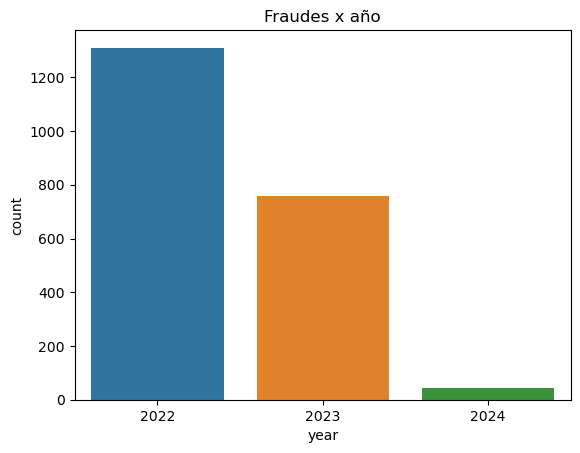

In [67]:
sns.countplot(data=df_fraud, x = 'year')
plt.title('Fraudes x año');

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


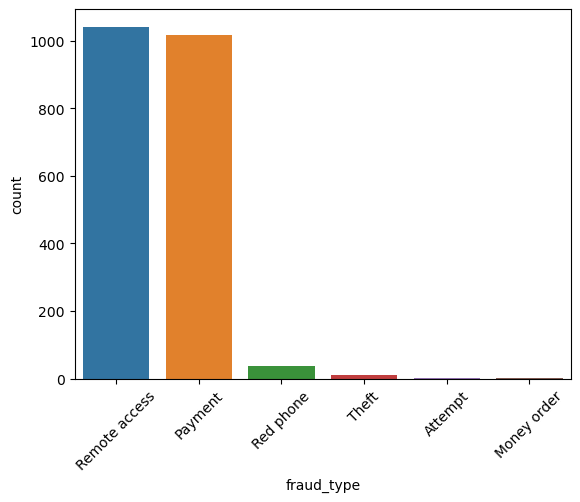

In [68]:
# Histograma de tipos de fraudes
df_fraud['fraud_type'] = df_fraud['fraud_type'].str.capitalize()
sns.countplot(data=df_fraud, x = 'fraud_type')
plt.xticks(rotation=45);
#sns.countplot(data=df1[df1['date_receiver']>'2023-01-01'], x = 'fraud_type')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

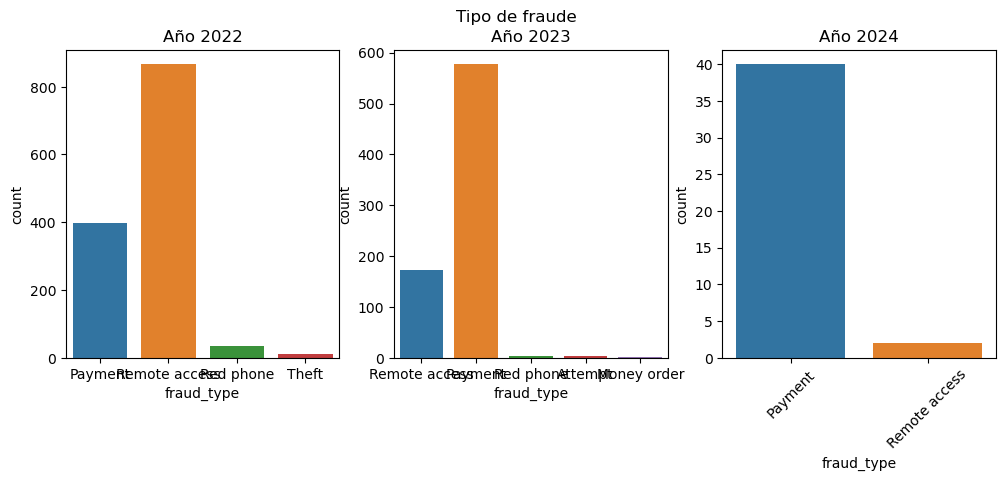

In [70]:
# Tipos de fraudes x a
fig, axs = plt.subplots(1,3,figsize = (12, 4))
fig.suptitle('Tipo de fraude')
sns.countplot(data=df_fraud[df_fraud['year']==2022], x = 'fraud_type', ax = axs[0]).set_title('Año 2022')
plt.xticks(rotation=45);
sns.countplot(data=df_fraud[df_fraud['year']==2023], x = 'fraud_type', ax = axs[1]).set_title('Año 2023')
plt.xticks(rotation=45);
sns.countplot(data=df_fraud[df_fraud['year']==2024], x = 'fraud_type', ax = axs[2]).set_title('Año 2024')
plt.xticks(rotation=45);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


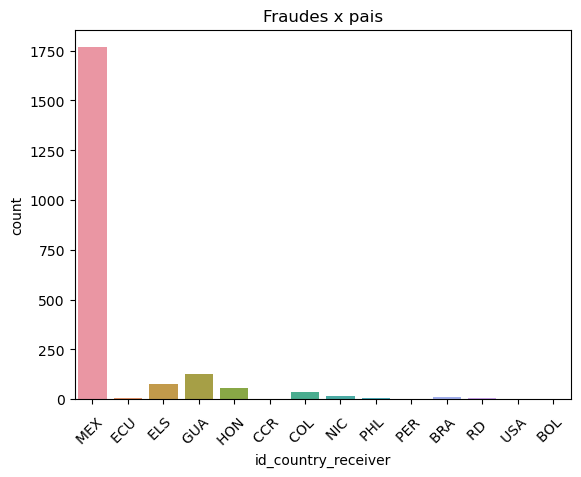

In [71]:
# Apretura por pais de fraudes
sns.countplot(data=df_fraud, x = 'id_country_receiver')
plt.xticks(rotation=45);
plt.title('Fraudes x pais');

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

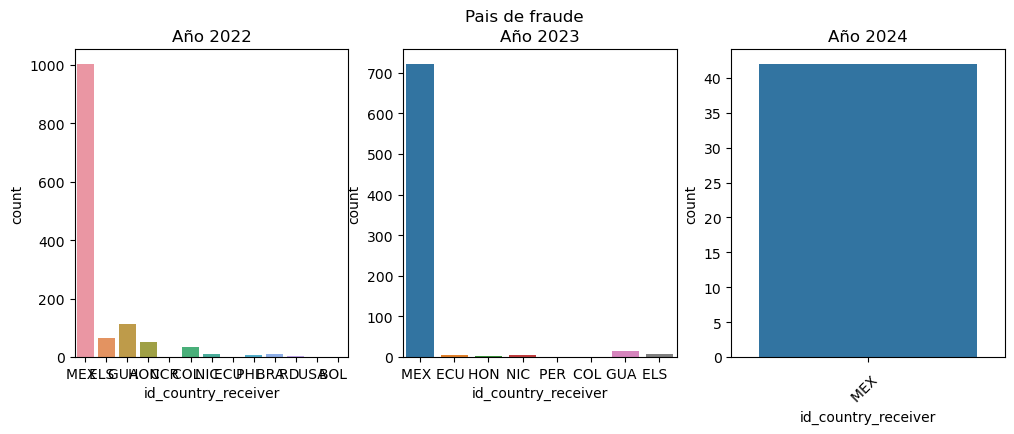

In [93]:
# Pais de fraudes x año
fig, axs = plt.subplots(1,3,figsize = (12, 4))
plt.suptitle('Pais de fraude')
sns.countplot(data=df_fraud[df_fraud['year']==2022], x = 'id_country_receiver', ax = axs[0]).set_title('Año 2022')
plt.xticks(rotation=45);
sns.countplot(data=df_fraud[df_fraud['year']==2023], x = 'id_country_receiver', ax = axs[1]).set_title('Año 2023')
plt.xticks(rotation=45);
sns.countplot(data=df_fraud[df_fraud['year']==2024], x = 'id_country_receiver', ax = axs[2]).set_title('Año 2024')
plt.xticks(rotation=45);

In [73]:
df_fraud.loc['date_receiver'] = pd.to_datetime(df_fraud['date_receiver'])
df_fraud['dia_semana'] = df_fraud['date_receiver'].dt.weekday
df_fraud['dia_semana'] = np.fix(df_fraud['dia_semana'])
df_fraud['dia_semana'] = df_fraud['dia_semana'].fillna(-1).astype(int)
#0:Lunes, 1: Martes
#Como Dia es 1:Monday, 2:Martes,... resto uno para q queden en los mismo

df_fraud['hora'] =  df_fraud['date_receiver'].dt.hour
df_fraud['hora'] = np.fix(df_fraud['hora'])
df_fraud['hora'] = df_fraud['hora'].fillna(-1).astype(int)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='dia_semana', ylabel='count'>

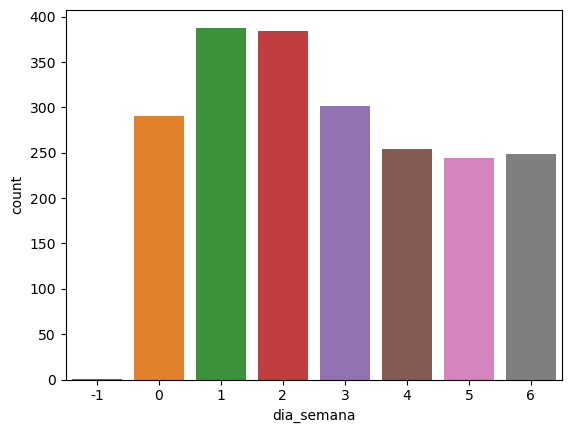

In [74]:
sns.countplot(data=df_fraud, x = 'dia_semana')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

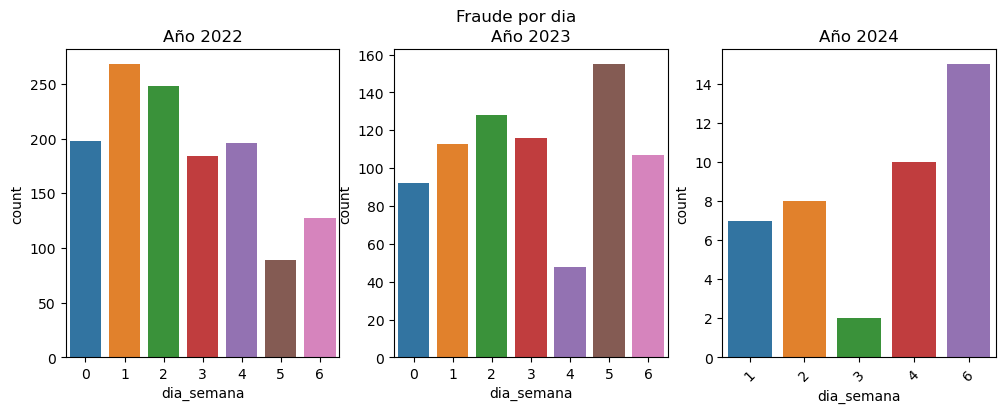

In [76]:
# Dia de fraudes x año
fig, axs = plt.subplots(1,3,figsize = (12, 4))
fig.suptitle('Fraude por dia')
sns.countplot(data=df_fraud[df_fraud['year']==2022], x = 'dia_semana', ax = axs[0]).set_title('Año 2022')
plt.xticks(rotation=45);
sns.countplot(data=df_fraud[df_fraud['year']==2023], x = 'dia_semana', ax = axs[1]).set_title('Año 2023')
plt.xticks(rotation=45);
sns.countplot(data=df_fraud[df_fraud['year']==2024], x = 'dia_semana', ax = axs[2]).set_title('Año 2024')
plt.xticks(rotation=45);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='hora', ylabel='count'>

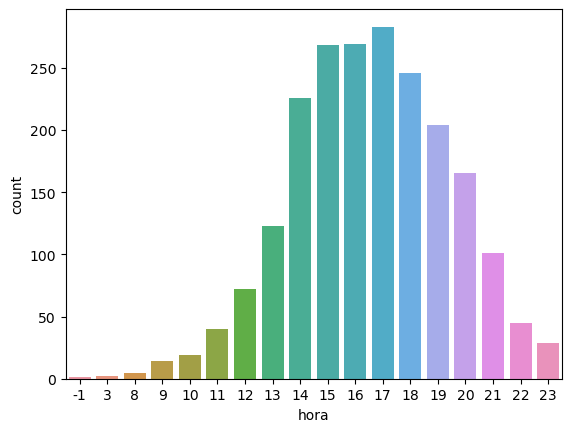

In [75]:
sns.countplot(data=df_fraud, x = 'hora')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

<AxesSubplot:xlabel='hora', ylabel='count'>

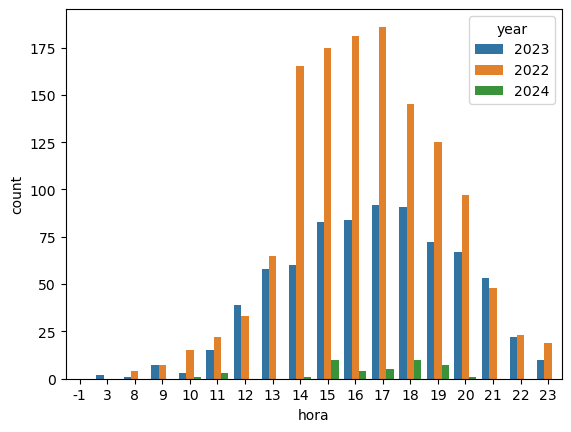

In [84]:
sns.countplot(data=df_fraud, x = 'hora', hue='year')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

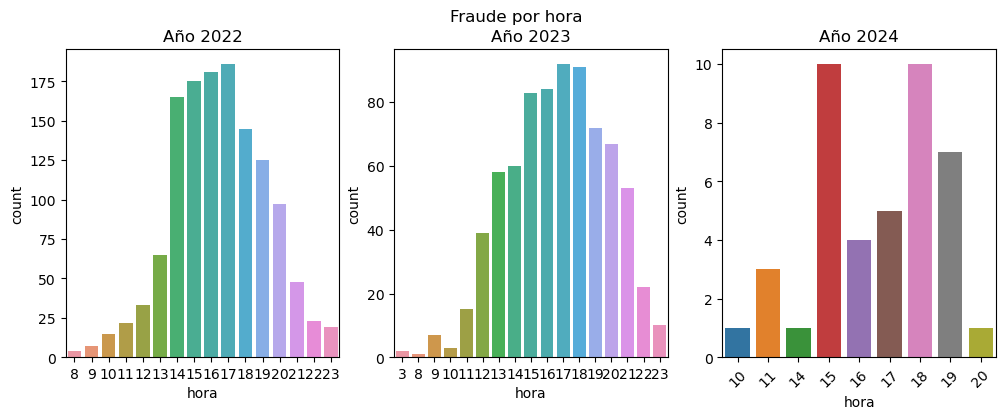

In [77]:
# Hola de fraudes x año
fig, axs = plt.subplots(1,3,figsize = (12, 4))
fig.suptitle('Fraude por hora')
sns.countplot(data=df_fraud[df_fraud['year']==2022], x = 'hora', ax = axs[0]).set_title('Año 2022')
plt.xticks(rotation=45);
sns.countplot(data=df_fraud[df_fraud['year']==2023], x = 'hora', ax = axs[1]).set_title('Año 2023')
plt.xticks(rotation=45);
sns.countplot(data=df_fraud[df_fraud['year']==2024], x = 'hora', ax = axs[2]).set_title('Año 2024')
plt.xticks(rotation=45);

In [94]:
df1.loc['date_receiver'] = pd.to_datetime(df1['date_receiver'])
df1['dia_semana'] = df1['date_receiver'].dt.weekday
df1['dia_semana'] = np.fix(df1['dia_semana'])
df1['dia_semana'] = df1['dia_semana'].fillna(-1).astype(int)
#0:Lunes, 1: Martes
#Como Dia es 1:Monday, 2:Martes,... resto uno para q queden en los mismo
df_dia['dia'] = df_dia['dia']-1

df1['hora'] =  df1['date_receiver'].dt.hour
df1['hora'] = np.fix(df1['hora'])
df1['hora'] = df1['hora'].fillna(-1).astype(int)


In [96]:
sum(df1['hora']<0)

1

## Miro como es para el universo de las transacciones totales

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


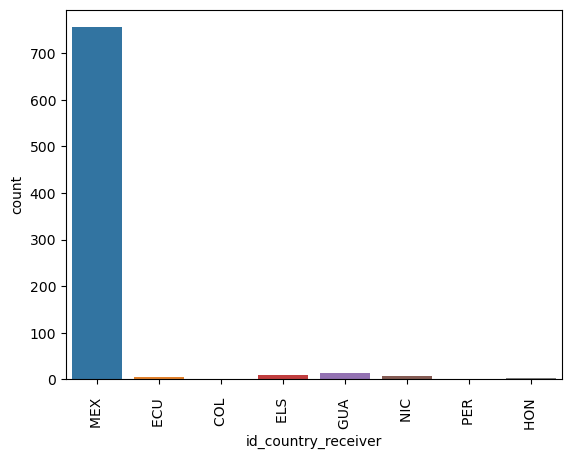

In [99]:
sns.countplot(data=df1, x = 'id_country_receiver')
plt.xticks(rotation=90);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


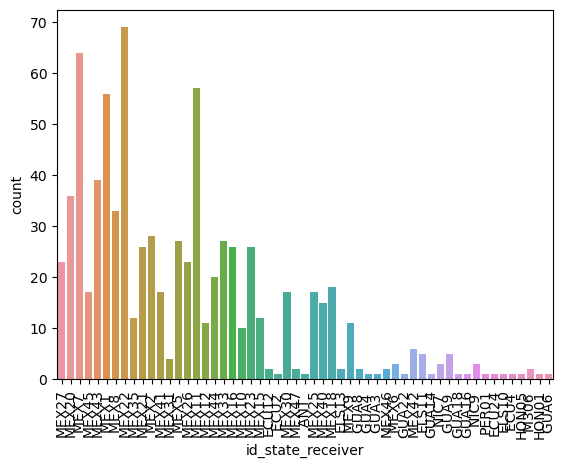

In [97]:
sns.countplot(data=df1, x = 'id_state_receiver')
plt.xticks(rotation=90);

In [121]:
#df_dia.set_index('dia',inplace=True)
df_dia = df_dia.sort_index(ascending=True)


<AxesSubplot:xlabel='dia'>

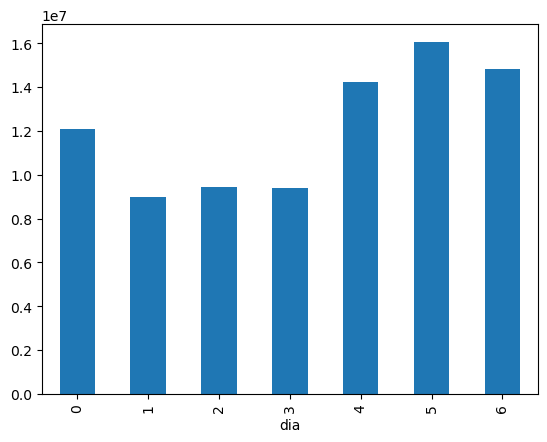

In [122]:
df_dia['cant'].plot(kind='bar')

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='hora', ylabel='cant'>

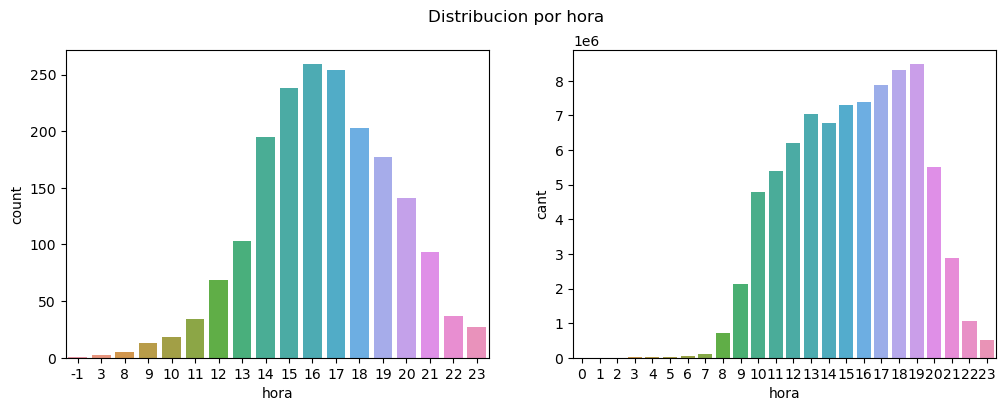

In [41]:
fig, axs = plt.subplots(1,2,figsize = (12, 4))
fig.suptitle('Distribucion por hora')
sns.countplot(data = df1, x = 'hora', ax = axs[0])
sns.barplot(data = df_hora, x ='hora', y = 'cant', ax = axs[1])


/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='dia', ylabel='cant'>

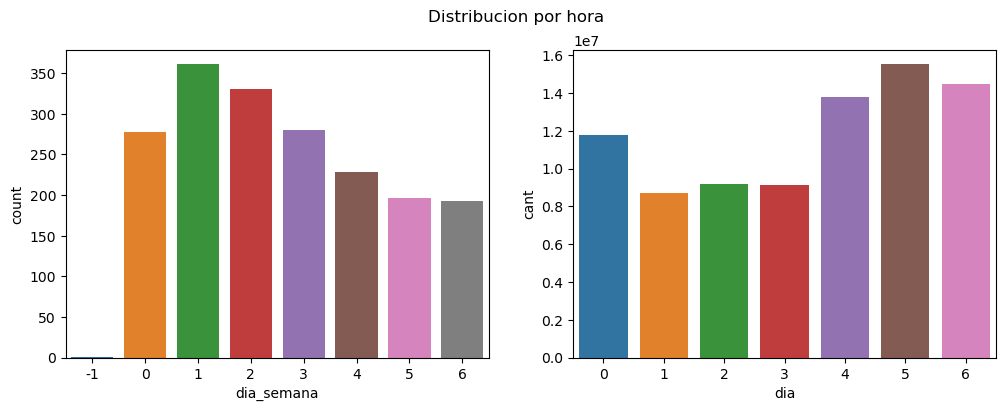

In [52]:
fig, axs = plt.subplots(1,2,figsize = (12, 4))
fig.suptitle('Distribucion por dia')
sns.countplot(data=df1, x = 'dia_semana', ax = axs[0])
sns.barplot(data = df_dia, x ='dia', y = 'cant', ax = axs[1])
#Dia_semana con 0:Lunes, 1: Martes

In [95]:
# Miro cuantos fraudes hay
df2.was_fraud.value_counts()

was_fraud
True     596
False    197
Name: count, dtype: int64

In [54]:
df1.id_payment.value_counts()


id_payment
C     1868
Name: count, dtype: int64